In [ ]:
# Code to be revised

In [13]:
%load_ext autoreload
%autoreload 2

import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import pymudokon as pm

plt.style.use("dark_background")
jax.config.update('jax_platform_name', 'cpu')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
stress_list = None
strain_list = None
@jax.tree_util.Partial
def save_data(package):
    global stress_list, strain_list
    step, stress, material, eps, *_ = package
    
    if stress_list is None:
        stress_list = stress
    else:
        stress_list = jnp.concat((stress_list, stress), axis=0)
    
    if strain_list is None:
        strain_list = eps
    else:
        strain_list = jnp.concat((strain_list, eps), axis=0)
    
    print(f"Step: {step}", end="\r")

total_time = 25.0
timestep = 0.01
strain_target = 0.005
num_steps = int(total_time/timestep)

num_particles =1

strain_target_list = -jnp.linspace(0,strain_target,num_steps)

eps_path = jnp.vstack([strain_target_list for _ in range(num_particles)])

In [15]:

stress_ref = jnp.tile(-100000.0*jnp.eye(3), (num_particles, 1, 1))

material = pm.ModifiedCamClay.register(
    E = 5e4,
    nu = 0.3,
    M = 1.2,
    lam = 0.62,
    kap = 0.055,
    Vs = 0.8,
    R = 1,
    stress_ref= stress_ref,
    num_particles =num_particles
)

volumes = jnp.ones(num_particles)


In [18]:
%timeit
material = pm.simple_shear(material,eps_path,volumes,timestep,50,save_data)

TypeError: 'NoneType' object is not subscriptable

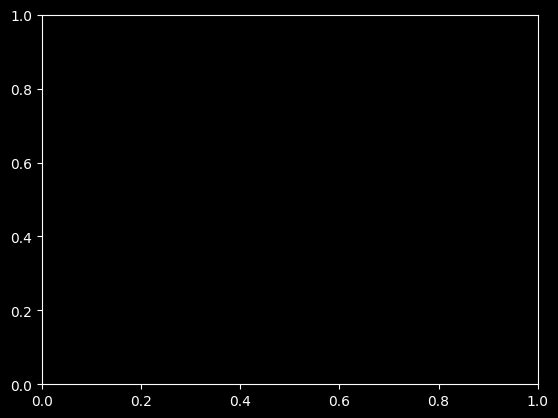

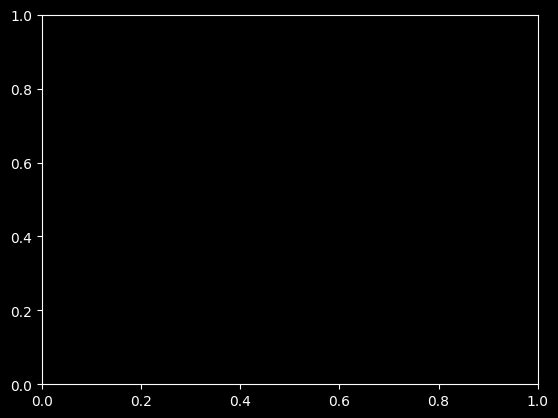

In [25]:
fig_tg, ax_tg = plt.subplots()
fig_pq, ax_pq = plt.subplots()

pm.plot_tau_gamma(
    stress_list,
    strain_list,
    fig_ax = (fig_tg,ax_tg),
    plot_options={"linewidth":2.0,"ls":"--"}
)

pm.plot_q_p(
    stress_list,
    fig_ax = (fig_pq,ax_pq),
    plot_options={"linewidth":2.0,"ls":"--"}
    )